In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

## Random Forrest Modelling

### Initial Model

In [72]:
train_test_data = pd.read_csv('../../../data/train_test_data.csv')

In [73]:
train_test_data

,opening_price,closing_price,timestamp,rank,ticker,name,mentions,mentioning_users,upvotes,sentiment,...,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,label,dividend_exists,change_in_rank,change_in_mentions
0,385.230,379.80,05-25-2023,1,NVDA,NVIDIA,3216,1370.0,30860,57.0,...,1.7415,173.5333,18.66000,0.052394,0.4956,0.2200,1,1,-0.666667,10.694545
1,30.500,28.41,05-25-2023,2,AI,C3 AI,1363,889.0,8328,68.0,...,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,1,0,1.000000,3.168196
2,117.305,120.35,05-25-2023,3,AMD,AMD,403,259.0,2718,64.0,...,0.2412,131.9033,2.40000,0.000000,0.0451,22.2000,0,0,-0.571429,3.380435
3,13.180,12.84,05-25-2023,6,PLTR,Palantir,145,69.0,354,69.0,...,-0.1246,0.0000,-7.15660,0.000000,0.0000,20.5000,1,0,0.500000,0.028369
4,186.540,184.47,05-25-2023,7,TSLA,Tesla,128,104.0,861,64.0,...,3.3967,49.9490,27.90000,0.000000,0.0557,38.3400,1,0,0.400000,0.267327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,790.640,812.00,06-02-2023,8,AVGO,Broadcom,113,74.0,274,58.0,...,30.2074,26.3232,58.26000,2.329261,1.6852,20.7400,0,1,-0.692308,2.645161
66,7.110,7.03,06-02-2023,9,SOFI,SoFi,108,62.0,403,72.0,...,-0.2665,0.0000,-1.40908,0.000000,1.1056,162.6023,1,0,0.800000,-0.504587
67,162.200,166.12,06-02-2023,10,DG,Dollar General,90,65.0,2156,77.0,...,10.6825,18.2371,40.63000,1.458050,1.2648,10.5900,0,1,-0.915966,6.500000
68,272.660,272.61,06-02-2023,11,META,Meta Platforms (Facebook),79,59.0,291,56.0,...,7.8343,31.6414,17.14000,0.000000,0.0960,-1.9400,1,0,-0.560000,1.821429


In [74]:
# Remove columns that are not needed for modelling

train_test_data = train_test_data.drop(
    ['name', 
     'ticker', 
     'timestamp',
#     'opening_price',
#    'closing_price'
    ], axis=1).sort_values(
    by=['mentions'], 
    ascending=False)

In [75]:
train_test_data

,opening_price,closing_price,rank,mentions,mentioning_users,upvotes,sentiment,rank_24h_ago,mentions_24h_ago,beta,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,label,dividend_exists,change_in_rank,change_in_mentions
0,385.23,379.80,1,3216,1370.0,30860,57.0,3,275,1.770654,1.7415,173.5333,18.66000,0.052394,0.4956,0.22,1,1,-0.666667,10.694545
40,41.10,40.01,1,1684,1076.0,10793,68.0,1,737,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,1,0,0.000000,1.284939
50,32.76,34.72,1,1401,856.0,8556,59.0,1,1689,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0,0,0.000000,-0.170515
1,30.50,28.41,2,1363,889.0,8328,68.0,1,327,2.707838,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,1,0,1.000000,3.168196
10,378.90,389.46,1,1268,738.0,24699,61.0,1,3050,1.770654,1.7415,214.7679,18.66000,0.042127,0.4956,0.22,0,1,0.000000,-0.584262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,835.12,803.34,13,29,23.0,80,89.0,31,7,1.109033,30.2074,26.4786,58.26000,2.263975,1.6852,20.74,1,1,-0.580645,3.142857
26,12.84,13.65,9,27,20.0,110,87.0,11,22,1.728892,-0.1246,0.0000,-7.15660,0.000000,0.0000,20.50,0,0,-0.181818,0.227273
27,173.32,175.43,10,23,23.0,94,77.0,9,36,1.161613,5.8857,28.8473,165.72000,0.547227,1.7635,-0.24,0,1,0.111111,-0.361111
28,116.04,120.11,11,22,22.0,368,82.0,7,42,1.475272,0.4125,177.2723,4.33000,0.000000,0.5612,9.87,0,0,0.571429,-0.476190


In [76]:
train_test_data.value_counts('label')

label
0    44
1    26
Name: count, dtype: int64

In [77]:
x_train, x_test, y_train, y_test = train_test_split(train_test_data.drop('label', axis=1), train_test_data['label'], test_size=0.3, random_state=42)

In [78]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

In [79]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [80]:
clf.score(x_test, y_test)

0.5714285714285714

In [81]:
clf.score(x_train, y_train)

1.0

### Hyper-parameter tuning

In [82]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [6, 8, 10, 12],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_
clf = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [83]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [84]:
grid_search.best_score_

0.6335784313725491

In [85]:
grid_search.score(x_test, y_test)

0.6190476190476191

### Visuallizing feature importance

In [86]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [87]:
feature_importances

,importance
revenue_growth_ttm_yoy,0.103155
rank_24h_ago,0.081937
opening_price,0.072849
change_in_rank,0.066803
change_in_mentions,0.066218
mentions,0.064226
sentiment,0.061468
upvotes,0.058039
mentions_24h_ago,0.054117
closing_price,0.053518


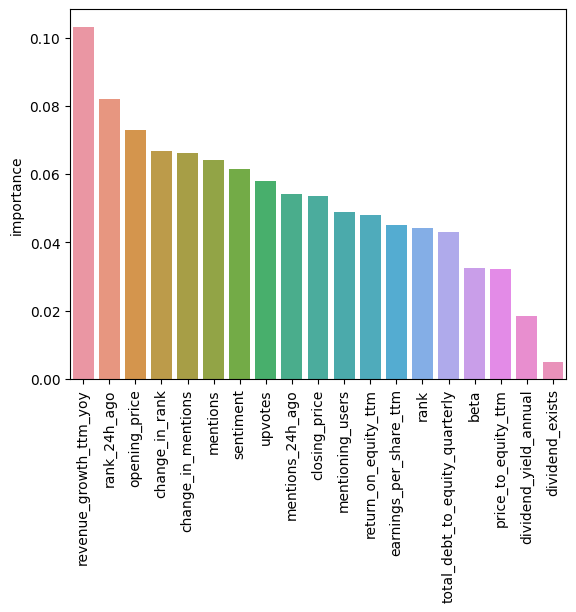

In [88]:
# visualize the most important features
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()